<font size="+5">#03. Arboles de Decision</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

Usamos la base de datos del **CIS** sobre una muestra de 2455, cuyas características son de aspecto sociológico. El `objetivo es determinar si una persona usa internet o no`.

```python
df = pd.read_csv('https://raw.githubusercontent.com/jesusloplar/data/main/uso_internet_espana.csv')
df.head()
```

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_base = pd.read_csv('https://raw.githubusercontent.com/jesusloplar/data/main/uso_internet_espana.csv')
df_base.head()

,uso_internet,sexo,edad,estudios
0,0,Mujer,66,Primaria
1,1,Hombre,72,Primaria
2,1,Hombre,48,Medios universitarios
3,0,Hombre,59,Superiores
4,1,Mujer,44,Superiores


# Transformación de los Datos

> 1. Las variables categóricas tienen valores de tipo `string` u `object`. Podéis consultarlo con `df.dtypes`.
> 2. El modelo no puede optimizarse si hay columnas de dichos tipos.
> 3. Deberíamos convertir las columnas categóricas a 0s y 1s. Es decir, **Variables Dummy**. Para ello, usaremos la función `pd.get_dummies(df)`.

In [3]:
df = pd.get_dummies(df_base, drop_first=True)

# Seleccionar Variables

> 1. `Variable Objetivo y`
> 2. El resto las usaremos como `Variables Explicativas X`

In [4]:
objetivo = df.uso_internet

In [5]:
explicativas = df.drop(columns='uso_internet')

# Entrenar Modelo `DecisionTreeClassifier()`

> Antes de irte a la torera a buscar lo que hemos visto durante la sesión. Piensa que:
>
> 1. Solo queremos importar una cosa; el objeto `DecisionTreeClassifier`.
> 2. Por tanto: `from ... import DecisionTreeClassifier()`
> 3. Tan solo tienes que pensar qué colocar en lugar de `...`. Teniendo en cuenta que la librería de `sklearn` contiene todo lo relacionado con los modelos de **Machine Learning**.
> 4. **Disciplina Sotástica:** Puedes usar el tabulador `tab` para que Python te vaya sugiriendo...

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier(max_depth=3)

In [17]:
model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier(max_depth=3)

# Visualizar Modelo

> 1. Usaremos la función `plot_tree()`, que se encuentra en el módulo `tree` de la librería `sklearn`
> 2. Podéis usar `shift + tab` para que `Python` os explique cómo usar la función `plot_tree()`

In [18]:
from sklearn.tree import plot_tree

In [19]:
import matplotlib.pyplot as plt

- lista de strings: s

In [20]:
a = 8

In [21]:
a = 'aoiusef'

In [22]:
a=['mujer', 'hombre']

In [23]:
explicativas

,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
0,66,1,0,1,0,0,0
1,72,0,0,1,0,0,0
2,48,0,1,0,0,0,0
3,59,0,0,0,0,0,1
4,44,1,0,0,0,0,1
...,...,...,...,...,...,...,...
2450,43,0,0,1,0,0,0
2451,18,1,0,0,1,0,0
2452,54,1,0,1,0,0,0
2453,31,0,0,0,1,0,0


- `DataFrame` =? `lista de strings`

In [24]:
a

['mujer', 'hombre']

In [25]:
explicativas.columns

Index(['edad', 'sexo_Mujer', 'estudios_Medios universitarios',
       'estudios_Primaria', 'estudios_Secundaria', 'estudios_Sin estudios',
       'estudios_Superiores'],
      dtype='object')

In [26]:
df.columns.tolist()

['uso_internet',
 'edad',
 'sexo_Mujer',
 'estudios_Medios universitarios',
 'estudios_Primaria',
 'estudios_Secundaria',
 'estudios_Sin estudios',
 'estudios_Superiores']

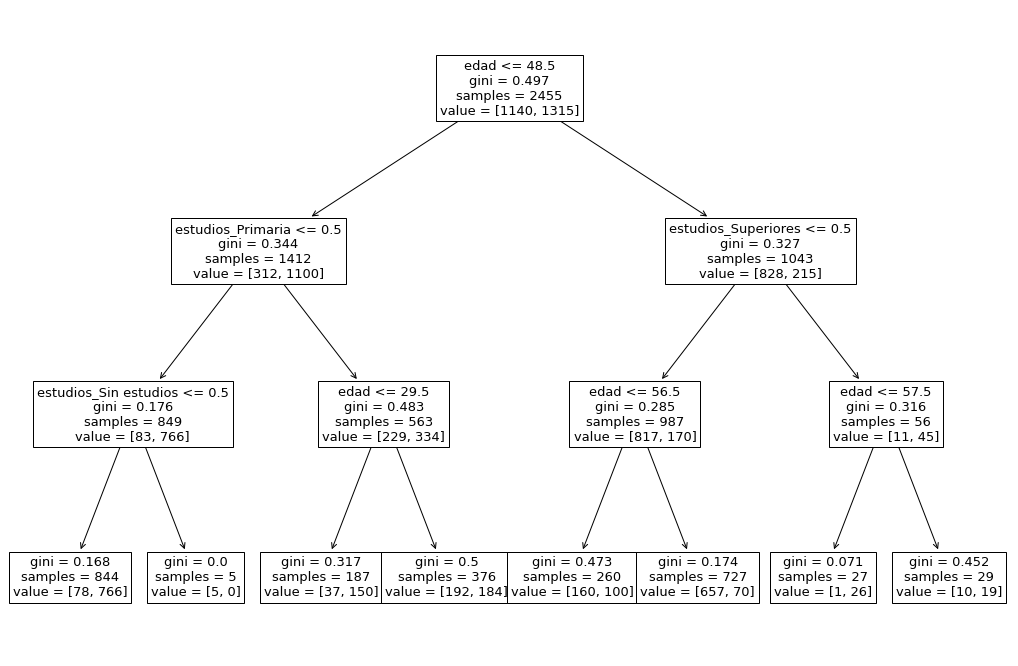

In [27]:
plt.figure(figsize=(18,12))
plot_tree(decision_tree=model, feature_names=explicativas.columns, fontsize=13);

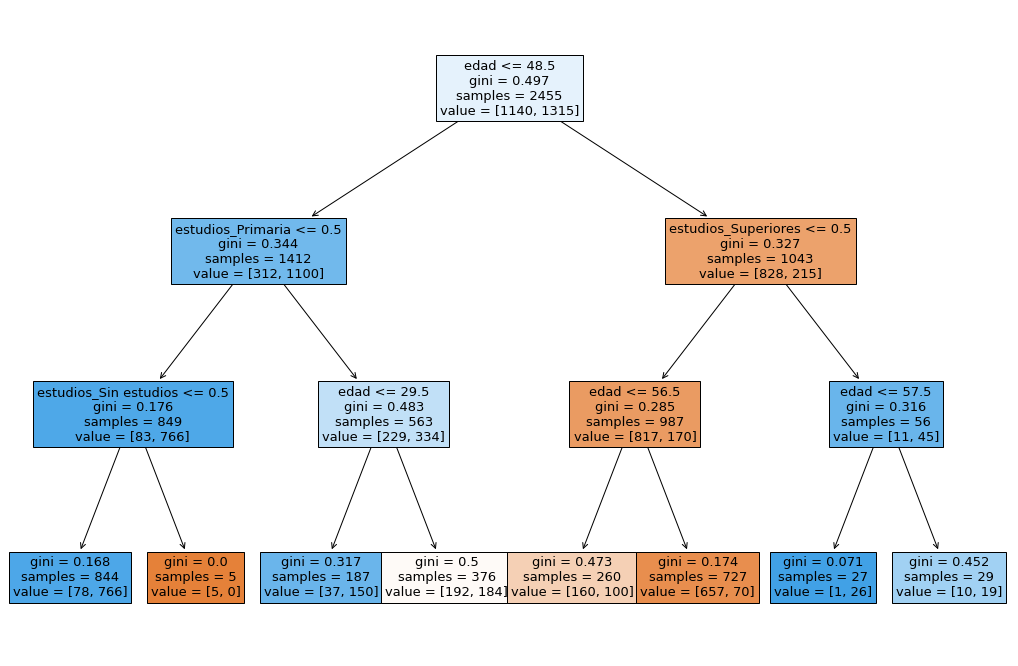

In [28]:
plt.figure(figsize=(18,12))
plot_tree(decision_tree=model, feature_names=explicativas.columns, fontsize=13, filled=True);

In [29]:
df.loc[281]

uso_internet                       1
edad                              35
sexo_Mujer                         0
estudios_Medios universitarios     0
estudios_Primaria                  0
estudios_Secundaria                0
estudios_Sin estudios              0
estudios_Superiores                1
Name: 281, dtype: int64

In [30]:
766/844

0.9075829383886256

In [31]:
df.uso_internet = df.uso_internet.astype(object)

In [32]:
df.dtypes

uso_internet                      object
edad                               int64
sexo_Mujer                         uint8
estudios_Medios universitarios     uint8
estudios_Primaria                  uint8
estudios_Secundaria                uint8
estudios_Sin estudios              uint8
estudios_Superiores                uint8
dtype: object

In [33]:
explicativas_cat = df.loc[:, df.dtypes == 'object'].drop(columns='uso_internet').columns
comb = list(zip(explicativas_cat, range(3)))
comb

[]

In [34]:
### Variables Numéricas

#### Método Gráfico

# A la hora de visualizar la relación entre las diferentes variables numércias explicativas, no podemos hacer un conteo como antes. Sino que debemos ver cómo se distribuyen estas variables en las distintas categorías de la variable objetivo.

# Podemos hacer diferentes gráficas:

explicativas_num = [i for i in df.columns if i not in explicativas_cat]
explicativas_num.remove('uso_internet')
comb = list(zip(explicativas_num, range(len(explicativas_num))))
comb

[('edad', 0),
 ('sexo_Mujer', 1),
 ('estudios_Medios universitarios', 2),
 ('estudios_Primaria', 3),
 ('estudios_Secundaria', 4),
 ('estudios_Sin estudios', 5),
 ('estudios_Superiores', 6)]

IndexError: index 4 is out of bounds for axis 0 with size 4

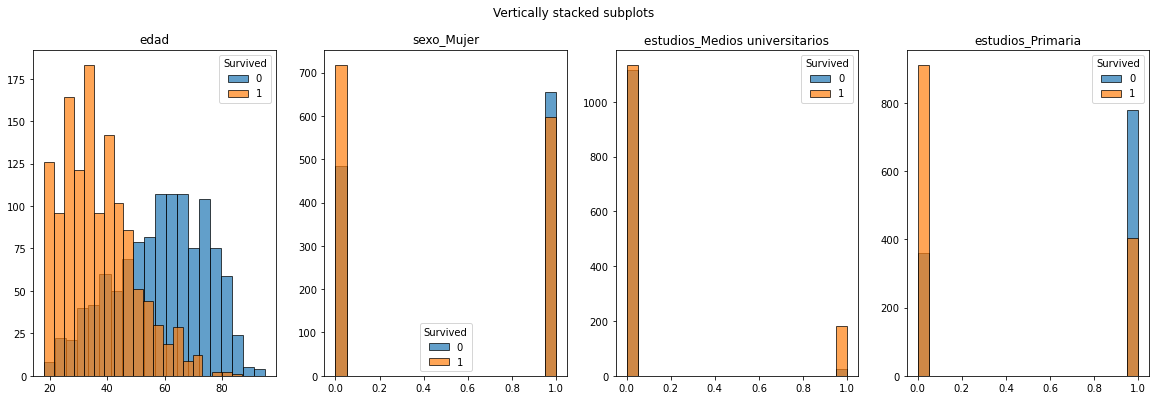

In [35]:
##### Histograma

fig, axs = plt.subplots(ncols=4, figsize=(20,6))
fig.suptitle('Vertically stacked subplots')

for i,j in comb:
    for lab, dat in df.groupby('uso_internet'):
        axs[j].hist(x=dat[i], label=lab, alpha=0.7, edgecolor='black', bins=20)
        axs[j].set_title(i)
        axs[j].legend(title='Survived')

In [ ]:
a = df_base.sample()

In [ ]:
a

In [ ]:
#Example sklearn.tree.plot_tree
from sklearn.datasets import load_iris
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

In [ ]:
import matplotlib.pyplot as plt

In [36]:
plt.figure(figsize=(12,8))
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

NameError: name 'clf' is not defined

<Figure size 864x576 with 0 Axes>

# Explicación Algoritmo Árbol de Decisión

> _Durante la corrección te explicare en detalle el funcionamiento de este algoritmo. Mientras tanto, podéis ver el vídeo que usaré para que os relacionéis con los conceptos:_
>
> - https://www.youtube.com/watch?v=7VeUPuFGJHk

# Interpretar Modelo

> - ¿Cómo se ha situado la variable en el **Nodo Raíz**? ¿Es la **variable más importante**? ¿Por qué?

In [37]:
df.loc[281]

uso_internet                       1
edad                              35
sexo_Mujer                         0
estudios_Medios universitarios     0
estudios_Primaria                  0
estudios_Secundaria                0
estudios_Sin estudios              0
estudios_Superiores                1
Name: 281, dtype: object

In [38]:
model.predict_proba(X=explicativas.loc[281].values.reshape(1,-1))

array([[0.09241706, 0.90758294]])

# Realizar Predicciones

> ¿No crees que si existe un modelo para calcular la ecuación matemática del árbol, probablemente habrá otro para **aplicar la ecuación matemática** sustituyendo por las variables de entrada, `explicativas X`?

In [39]:
model.predict_proba(explicativas)

array([[0.90371389, 0.09628611],
       [0.90371389, 0.09628611],
       [0.09241706, 0.90758294],
       ...,
       [0.61538462, 0.38461538],
       [0.09241706, 0.90758294],
       [0.61538462, 0.38461538]])

In [40]:
import numpy as np

In [41]:
np.where(model.predict_proba(explicativas)[:, 1]> 0.5, 1, 0)

array([0, 0, 1, ..., 0, 1, 0])

In [42]:
predicciones = model.predict(explicativas)

# Realidad vs Predicciones

> ¿Cómo de bueno es nuestro modelo?
>
> 1. Si pasamos las predicciones como una nuevo columna del `DataFrame`, podremos observar que **las predicciones de nuestro modelo pueden no coincidir con la realidad**.
>
>    - `df['pred'] = predicciones`
>
> 2. ¿Cómo medimos el **error de nuestro modelo**? ¿Cómo de bueno es nuestro modelo para describir la realidad?
>    - `df.sample(10)` para comprobar si las predicciones de nuestro modelo coinciden con la realidad...

In [43]:
df['pred'] = predicciones
df.sample(10)

,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores,pred
650,1,37,0,0,0,1,0,0,1
2361,1,41,0,0,0,0,0,0,1
171,1,41,0,0,1,0,0,0,0
1403,0,64,0,0,1,0,0,0,0
1235,1,31,0,0,0,0,0,0,1
581,0,76,0,0,1,0,0,0,0
1211,0,69,0,0,0,0,1,0,0
1217,1,46,1,0,1,0,0,0,0
46,0,29,1,0,1,0,0,0,1
1367,1,27,1,0,0,0,0,0,1


In [44]:
df['pred'] == df['uso_internet']

0        True
1       False
2        True
3       False
4        True
        ...  
2450    False
2451     True
2452     True
2453     True
2454     True
Length: 2455, dtype: bool

In [45]:
(df['pred'] == df['uso_internet']).sum()

1975

In [46]:
(df['pred'] == df['uso_internet']).sum()/2455

0.8044806517311609

In [47]:
model.score(X=explicativas, y=objetivo)

0.8044806517311609

# Matriz de Confusión

> 1. Usar la función `confusion_matrix()`, o `plot_confusion_matrix()`
> 2. ¿Qué representa cada número?

In [48]:
from sklearn.metrics import plot_confusion_matrix

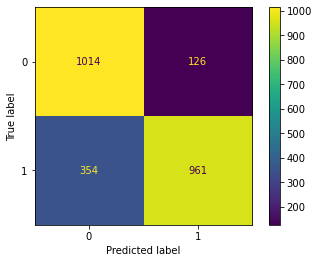

In [49]:
plot_confusion_matrix(estimator=model, X=explicativas, y_true=objetivo)

In [50]:
sensitividad = 961/(354+961)

In [51]:
sensitividad

0.7307984790874524

In [52]:
especificidad = 1014/(1014 + 126)

In [54]:
especificidad

0.8894736842105263

In [55]:
df.groupby(['pred', 'uso_internet']).size().to_frame(name='freq')

freq
pred uso_internet      
0    0             1014
     1              354
1    0              126
     1              961

# Otrás Métricas

> Siempre tomaremos como `referencia la realidad (por filas)`. Imaginando que estamos prediciendo si una persona tiene COVID o no, nos preguntaremos:

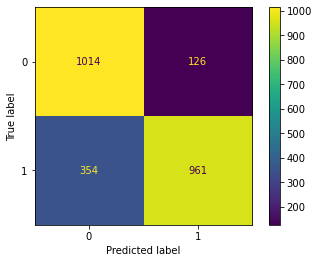

In [56]:
plot_confusion_matrix(estimator=model, X=explicativas, y_true=objetivo)

## Sensitividad

> - Dentro de las personas que, realmente, `tienen COVID (1)`, cuántas predice nuestro modelo como que tienen COVID (1)?

In [57]:
sensitividad = 961/(354+961)

In [58]:
sensitividad

0.7307984790874524

## Especificidad

> - Dentro de las personas que, realmente, `NO tienen COVID (0)`, cuántas predice nuestro modelo como que NO tienen COVID (0)?

In [59]:
especificidad = 1014/(1014 + 126)

In [60]:
especificidad

0.8894736842105263

## Classification Report

> 1. Usaremos la función `classification_report()`
> 2. Guardamos el objeto resultante en `reporte`
> 3. Coinciden algunos de los números de la tabla, `print(reporte)`, con los que hemos calculado anteriormente?

In [61]:
from sklearn.metrics import classification_report

In [62]:
reporte = classification_report(y_true = objetivo, y_pred=df.pred)

In [63]:
print(reporte)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1140
           1       0.88      0.73      0.80      1315

    accuracy                           0.80      2455
   macro avg       0.81      0.81      0.80      2455
weighted avg       0.82      0.80      0.80      2455



## Curva ROC

> - Usaremos la función `plot_roc_curve()`
>
> _PD: Durante la corrección te explicare en detalle el funcionamiento la Curva ROC. Mientras tanto puedes hacer uso del vídeo que usaré:_
>
> - https://www.youtube.com/watch?v=7VeUPuFGJHk

# Otrás Métricas

> Siempre tomaremos como `referencia la realidad (por filas)`. Imaginando que estamos prediciendo si una persona tiene COVID o no, nos preguntaremos:

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model_lr = LogisticRegression()

In [66]:
model_lr.fit(X=explicativas, y=objetivo)

/Users/monicagonzalezroyo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

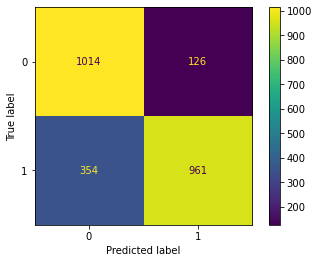

In [67]:
plot_confusion_matrix(estimator=model, X=explicativas, y_true=objetivo)

## Classification Report

> 1. Usaremos la función `classification_report()`
> 2. Guardamos el objeto resultante en `reporte`
> 3. Coinciden algunos de los números de la tabla, `print(reporte)`, con los que hemos calculado anteriormente?

In [68]:
from sklearn.metrics import classification_report

In [69]:
reporte = classification_report(y_true = objetivo, y_pred=df.pred)

In [70]:
print(reporte)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1140
           1       0.88      0.73      0.80      1315

    accuracy                           0.80      2455
   macro avg       0.81      0.81      0.80      2455
weighted avg       0.82      0.80      0.80      2455



In [71]:
reporte_lr = classification_report(y_true = objetivo, y_pred=model_lr.predict(explicativas))

In [72]:
print(reporte_lr)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1140
           1       0.83      0.87      0.85      1315

    accuracy                           0.83      2455
   macro avg       0.83      0.83      0.83      2455
weighted avg       0.83      0.83      0.83      2455



## Curva ROC

> - Usaremos la función `plot_roc_curve()`
>
> _PD: Durante la corrección te explicare en detalle el funcionamiento la Curva ROC. Mientras tanto puedes hacer uso del vídeo que usaré:_
>
> - https://www.youtube.com/watch?v=7VeUPuFGJHk

In [73]:
from sklearn.metrics import plot_roc_curve

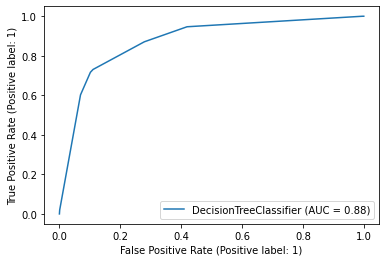

In [74]:
plot_roc_curve(estimator=model, X=explicativas, y=objetivo)

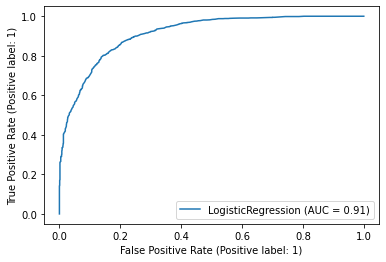

In [75]:
plot_roc_curve(estimator=model_lr, X=explicativas, y=objetivo)

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [X] Entender cómo se usan los **Algoritmos de Árboles**.
- [X] Entender otra forma de **comparar los datos reales con las predicciones** del modelo.
- [X] No todas las visualizaciones de modelos son iguales. En este caso también podemos **visualizar un árbol** para interpretar el modelo.
- [X] Distinguir el papel de la **probabilidad** a la hora de optimizar este tipo de modelos.
- [X] Saber determinar **por qué una variable es importante** en el modelo. Es decir, por qué aporta diferencias significativas.
- [X] Entender la necesidad de **normalizar** los datos.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# Tipos de Modelos
- clasificacion: predecir variable categorica
    - supervisado: existe la variable objetivo
    - no supervisado: no existe y la tengo que adivinar (analisis de cluster)
- regresion: predecir variable numerica